# Insurance Fraud

RadySafe Insurance company has recently come under increased pressure to improve its operation. Unfortunately, the investment side of its business has not been performing well, and management expects better operating income performance. One of their greatest concerns has been fraudulent claims.

Even worse, the company's business analytics specialist was recently poached by one of its competitors who offered her quite a lucrative salary/benefits package. She relocated and started with them on January 1, 2009. The company realizes it cannot replace such a valuable human resource in a short amount of time, and has decided to contract you to help provide guidance on some key decisions. 

It is Monday, January 5<sup>th</sup>, 2009, and RadySafe Insurance is eagerly awaiting your recommendations. As part of your contract, you have been given access to a random sample of 4,415 of their claims data from last year. This can be found in the file: `insurance.parquet`, along with its data description in `insurance_description.md`.

#### **Question 1**
***Should RadySafe Insurance raise premiums in 2009?***

Under RadySafe Insurance policy guidelines, a policy premium increase is merited if the average claim amount has increased by at least 5\% over the previous year. The accounting department has reported that the average claim amount in 2007 was \$63,500.

Note: The `claim_amount` variable in the dataset is reported in \$1,000's of dollars.

Make sure to clearly describe your null and alternative hypotheses. Would you order a reevaluation of the policy premiums based on the available data? Why or why not?

### Answer 1

Null Hypothesis

Ho : The average claim amount in 2009 has not increased by at least 5% over the average from 2007.
     avg amount <= 1.05 * 63,500 = 66675

Alternate Hypothesis

Ha : The average claim amount in 2009 has increased by at least 5% over the average from 2007.
     avg amount > 1.05 * 63,500 = 66675




In [128]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns
df = pd.read_parquet('insurance.parquet')
df.head()

mean_2007 = 63500
mean_2009  = 1.05 * 63500

In [129]:
df['claim_amount_000s'] = df['claim_amount']*1000
claim_avg = df['claim_amount_000s'].mean()
claim_std = df['claim_amount_000s'].std()
[claim_avg, claim_std]
df

,claimid,incident_date,claim_type,uninhabitable,claim_amount,fraudulent,policyid,policy_date,coverage,deductible,...,dob,edcat,job_start_date,retire,income,marital,reside,occupancy_date,primary_residence,claim_amount_000s
0,351069569,2008-01-18 10:09:59+00:00,Fire/Smoke,No,192.287,No,SSB-514465,1987-01-26 00:26:43+00:00,436,2000,...,1943-03-12,High school,1981-04-16,No,193,Unmarried,1,1978-01-06,Yes,192287.0
1,806984053,2008-07-18 23:21:30+00:00,Fire/Smoke,No,355.896,No,XWZ-702801,1983-05-14 16:02:51+00:00,925,1000,...,1933-05-10,High school,1982-11-04,No,203,Unmarried,1,1971-02-04,Yes,355896.0
2,654100160,2008-03-01 00:42:16+00:00,Theft/Vandalism,No,3.530,No,FMP-391297,1988-01-15 11:53:21+00:00,79,1000,...,1939-04-02,High school,2004-08-20,No,49,Unmarried,1,1977-03-30,Yes,3530.0
3,653220231,2008-10-28 10:00:09+00:00,Wind/Hail,No,33.452,No,WEV-471919,2000-02-22 19:19:45+00:00,607,1000,...,1972-04-12,Some college,1999-07-29,No,118,Married,3,1993-05-23,Yes,33452.0
4,226637568,2008-05-31 03:55:07+00:00,Theft/Vandalism,No,4.029,No,ESY-256692,2001-08-09 22:37:46+00:00,119,3000,...,1968-08-04,No high school,2004-07-04,No,18,Unmarried,1,2000-09-04,Yes,4029.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4410,480679892,2008-03-14 19:45:25+00:00,Contamination,No,44.785,No,AEG-804848,1981-10-13 09:04:28+00:00,95,1000,...,1945-04-16,Some college,2002-06-09,No,40,Married,2,1976-02-12,Yes,44785.0
4411,978293405,2008-01-16 14:54:24+00:00,Fire/Smoke,Yes,175.000,No,VXA-739792,2002-03-14 18:20:21+00:00,175,1000,...,1961-01-25,Some college,2001-06-13,No,80,Unmarried,1,1996-03-14,Yes,175000.0
4412,832521237,2008-07-01 04:00:29+00:00,Contamination,No,170.787,No,ZIJ-989259,1990-05-30 13:48:34+00:00,475,1000,...,1942-03-23,Some college,1977-08-29,Yes,254,Married,2,1984-04-15,No,170787.0
4413,646426289,2008-06-03 11:29:38+00:00,Fire/Smoke,No,137.790,No,QJD-843265,2007-07-08 06:28:25+00:00,327,1000,...,1978-10-28,Some college,2004-02-22,No,68,Unmarried,2,2003-01-20,Yes,137790.0


In [130]:
n = len(df)
confidence_level_95 = 0.95

z_value_95 = stats.norm.ppf(1 - (1 - confidence_level_95) / 2)

SE  = claim_std / (n ** 0.5)

# Calculate the margin of error
ME = z_value_95 * SE
# Calculate the confidence interval
lower_bound = claim_avg - ME
upper_bound = claim_avg + ME

CI = (lower_bound, upper_bound)

if mean_2009 > CI[1] or mean_2009 < CI[0]:
    print('Null hypothesis is rejected, RadySafe Insurance should raise premiums in 2009')
else:
    print('Null hypothesis is accepted, RadySafe Insurance should not raise premiums in 2009')

Null hypothesis is rejected, RadySafe Insurance should raise premiums in 2009


#### **Question 2**
***Should RadySafe Insurance charge different demographic groups different premiums?***

RadySafe would like to revisit how their current premiums take into account gender and workforce status. If different demographic groups exhibit different claims behavior, perhaps they should be charged different premiums.

For instance, if one gender group tends to file larger and more frequent claims than another one, perhaps they should also pay a higher policy premium to cover the additional risk.

RadySafe would like you to examine the claims data provided to you to assess the following questions:

* **Do individuals identifying as male claim higher amounts on their policy than those identifying as female?**

    *Hint: Make use of the `gender` variable*

* **Do retirees claim lower amounts on their policy?**

    *Hint: Similarly, make use of the `retire` variable*

Clearly describe your null and alternative hypotheses in each case. Provide both graphical and statistical evidence to support your recommendation.

### Answer 2

#### 2 (a)



Null Hypothesis

Ho : Individuals identifying as male claim same amounts on their policy than those identifying as 
        mean_male = mean_female

Alternate Hypothesis

Ha : Individuals identifying as male claim higher amounts on their policy than those identifying as female
        mean_male > mean_female


In [131]:
gender_group_stats = df.groupby('gender')['claim_amount_000s'].agg(['mean', 'std'])
mean_male = gender_group_stats.loc['Male', 'mean']
std_male = gender_group_stats.loc['Male', 'std']

mean_female = gender_group_stats.loc['Female', 'mean']
std_female = gender_group_stats.loc['Female', 'std']

gender_group_stats


/tmp/ipykernel_1603/4249309348.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_group_stats = df.groupby('gender')['claim_amount_000s'].agg(['mean', 'std'])


,mean,std
gender,,
Male,74228.946851,147857.827095
Female,71828.214330,140987.134728


Null hypothesis is accepted, males claim equal amounts on their policy as females


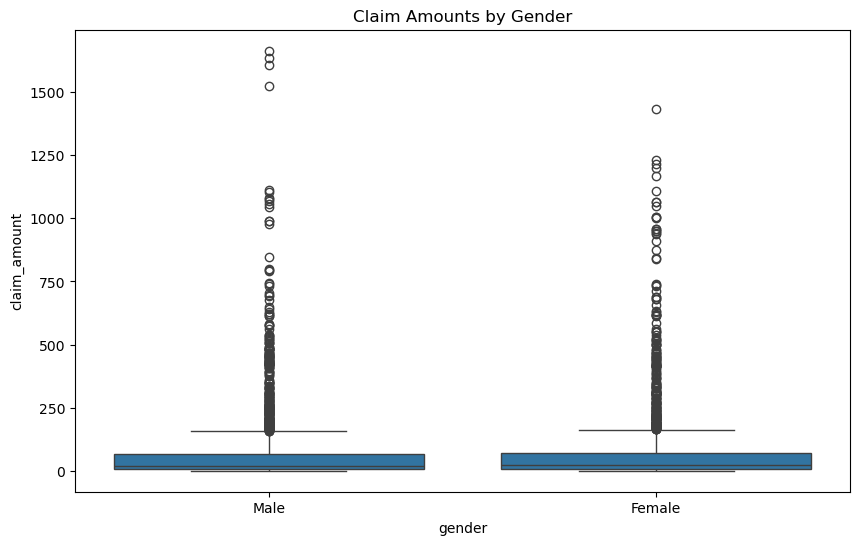

In [132]:
n = df[df['gender'] == 'Male'].shape[0]
SE  = std_male / (n ** 0.5)

# Calculate the margin of error
ME = z_value_95 * SE
# Calculate the confidence interval
lower_bound = mean_male - ME
upper_bound = mean_male + ME

CI = (lower_bound, upper_bound)

if mean_female > CI[1] or mean_female < CI[0]:
    print('Null hypothesis is rejected, males claim higher amounts on their policy than females')
else:
    print('Null hypothesis is accepted, males claim equal amounts on their policy as females')

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['gender'], y=df['claim_amount'], data=df)
plt.title('Claim Amounts by Gender')
plt.show()

#### 2 (b)

Null Hypothesis

Ho : Retirees claim same amounts on their policy as others
        mean_retirees = mean_others

Alternate Hypothesis

Ha : Retirees claim lower amounts on their policy than others
        mean_retirees < mean_others


In [133]:
retire_group_stats = df.groupby('retire')['claim_amount_000s'].agg(['mean', 'std'])
mean_retire = retire_group_stats.loc['Yes', 'mean']
std_retire = retire_group_stats.loc['Yes', 'std']

mean_others = retire_group_stats.loc['No', 'mean']
std_others = retire_group_stats.loc['No', 'std']

retire_group_stats

/tmp/ipykernel_1603/2079424878.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retire_group_stats = df.groupby('retire')['claim_amount_000s'].agg(['mean', 'std'])


,mean,std
retire,,
Yes,37313.141115,60529.064251
No,78345.591382,152325.320431


Null hypothesis is rejected, Retirees claim lower amounts on their policy than others


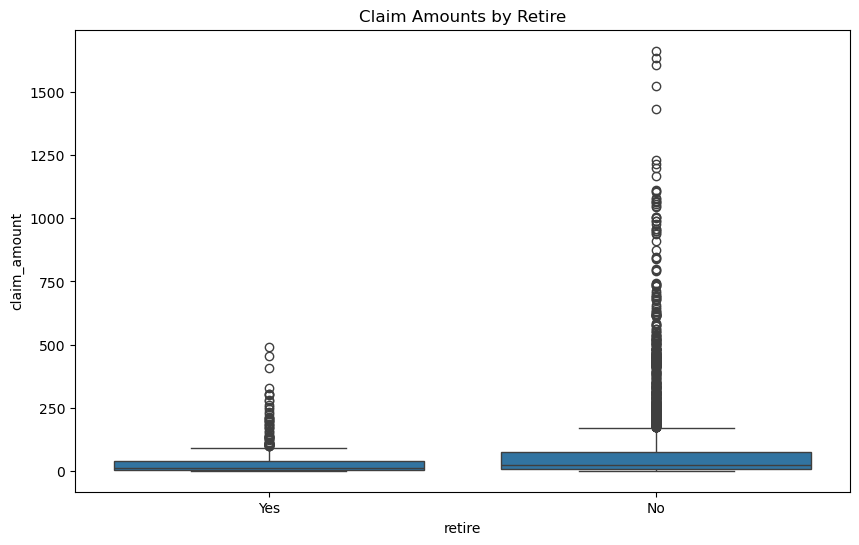

In [134]:
n = df[df['retire'] == 'Yes'].shape[0]
SE  = std_retire / (n ** 0.5)

# Calculate the margin of error
ME = z_value_95 * SE
# Calculate the confidence interval
lower_bound = mean_retire - ME
upper_bound = mean_retire + ME

CI = (lower_bound, upper_bound)

if mean_others > CI[1] or mean_others < CI[0]:
    print('Null hypothesis is rejected, Retirees claim lower amounts on their policy than others')
else:
    print('Null hypothesis is accepted, Retirees claim same amounts on their policy than others')
    
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['retire'], y=df['claim_amount'], data=df)
plt.title('Claim Amounts by Retire')
plt.show()

#### **Question 3**
***Have RadySafe Insurance's efforts to catch fraud been effective?***

At the end of 2007, RadySafe invested heavily to implement fraud detection algorithms in their claims processes. For the year of 2007, they ultimately determined that 9.8% of all claims were fraudulent. RadySafe wants to know if their investment in fraud detection has paid off in 2008. 

Do you believe their investments have enabled them to identify fraud significantly better? Please explain your reasoning. Clearly describe your null and alternative hypotheses. For simplicity, you may assume that policy holders are no more, or less, likely to file fraudulent claims in 2008 and that any difference in detection rate can be linked to the new detection algorithms.

### Answer 3

Null Hypothesis

Ho : RadySafe Insurance's efforts to catch fraud has not been effective

Alternate Hypothesis

Ha : RadySafe Insurance's efforts to catch fraud been effective

In [135]:
p = 0.098
fraud = df[df['fraudulent'] == 'Yes'].shape[0]
n = len(df)
p_hat = fraud / n

z_value_95 = stats.norm.ppf(1 - (1 - confidence_level_95) / 2)

# Calculate the standard error for the proportion
SE_prop = (p_hat * (1 - p_hat) / n) ** 0.5
ME = z_value_95 * SE_prop

lower_bound_prop = p_hat - ME
upper_bound_prop = p_hat + ME

CI = [lower_bound_prop, upper_bound_prop]

if p > CI[1] or p < CI[0]:
    print('Null hypothesis is rejected, RadySafe Insurances efforts to catch fraud been effective')
else:
    print('Null hypothesis is accepted, RadySafe Insurances efforts to catch fraud has not been effective')

z_calc = (p_hat - p )/(p * (1 - p) / n) ** 0.5
p_value = stats.norm.sf(z_calc)
p_value

Null hypothesis is accepted, RadySafe Insurances efforts to catch fraud has not been effective


0.06235616211543339

#### **Question 4**
***Are fraudulent claim amounts higher or lower than non-fraudulent claim amounts?***

Clearly describe your null and alternative hypotheses. Provide both graphical and statistical evidence to support your answer.

### Answer 3

Null Hypothesis

Ho : fraudulent claim amounts equal to non-fraudulent claim amounts

Alternate Hypothesis

Ha : fraudulent claim amounts higher or lower than non-fraudulent claim amounts

In [136]:
fraudulent_stats = df.groupby('fraudulent')['claim_amount_000s'].agg(['mean', 'std'])
mean_fraud = fraudulent_stats.loc['Yes', 'mean']
std_fraud = fraudulent_stats.loc['Yes', 'std']

mean_non_fraud = fraudulent_stats.loc['No', 'mean']
std_non_fraud = fraudulent_stats.loc['No', 'std']
fraudulent_stats

/tmp/ipykernel_1603/3398301527.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraudulent_stats = df.groupby('fraudulent')['claim_amount_000s'].agg(['mean', 'std'])


,mean,std
fraudulent,,
Yes,66009.435205,133863.201587
No,73831.171812,145579.901566


Null hypothesis is accepted, fraudulent claim amounts equal to non-fraudulent claim amounts


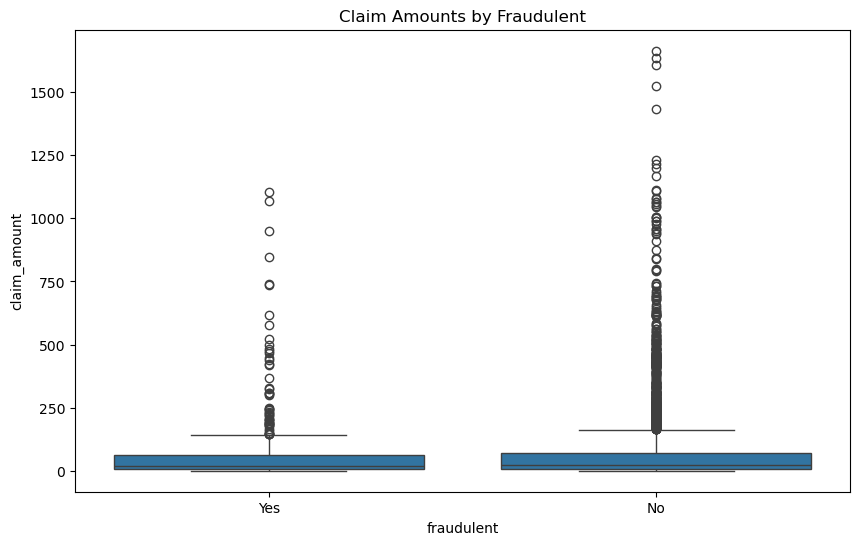

In [137]:
n = df[df['fraudulent'] == 'Yes'].shape[0]
SE  = std_fraud / (n ** 0.5)

# Calculate the margin of error
ME = z_value_95 * SE
# Calculate the confidence interval
lower_bound = mean_fraud - ME
upper_bound = mean_fraud + ME

CI = (lower_bound, upper_bound)

if mean_non_fraud > CI[1] or mean_non_fraud < CI[0]:
    print('Null hypothesis is rejected, fraudulent claim amounts higher or lower than non-fraudulent claim amounts')
else:
    print('Null hypothesis is accepted, fraudulent claim amounts equal to non-fraudulent claim amounts')

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['fraudulent'], y=df['claim_amount'], data=df)
plt.title('Claim Amounts by Fraudulent')
plt.show()